In [1]:
import utils
import shap
import numpy as np
from joblib import dump, load
from ucimlrepo import fetch_ucirepo

covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

c:\School\repositories\CSCI635\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [3]:
X_background_scaled = shap.sample(X_train_scaled, 50, random_state=34)
X_background = shap.sample(X_train, 50, random_state=34)


In [4]:
knn_model = load('../data/best_knn.joblib')
decision_tree_model = load('../data/best_decision_tree.joblib')

In [5]:
X_sample = X_test[:100]
X_sample_scaled = X_test_scaled[:100]

## Decision Tree SHAP Interpretibility

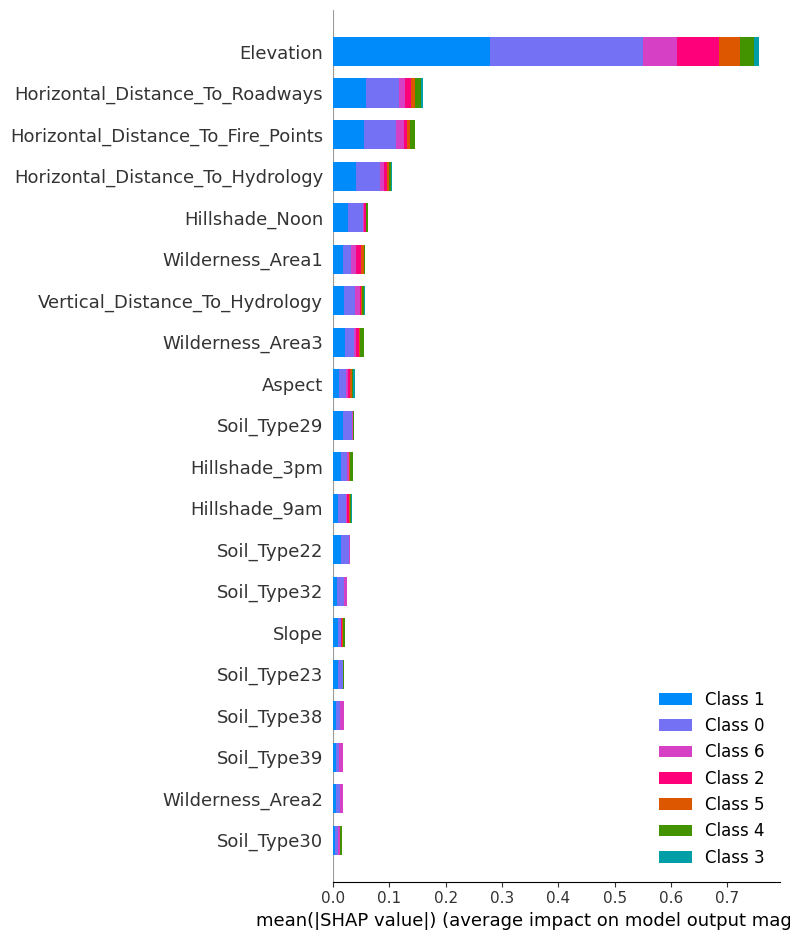

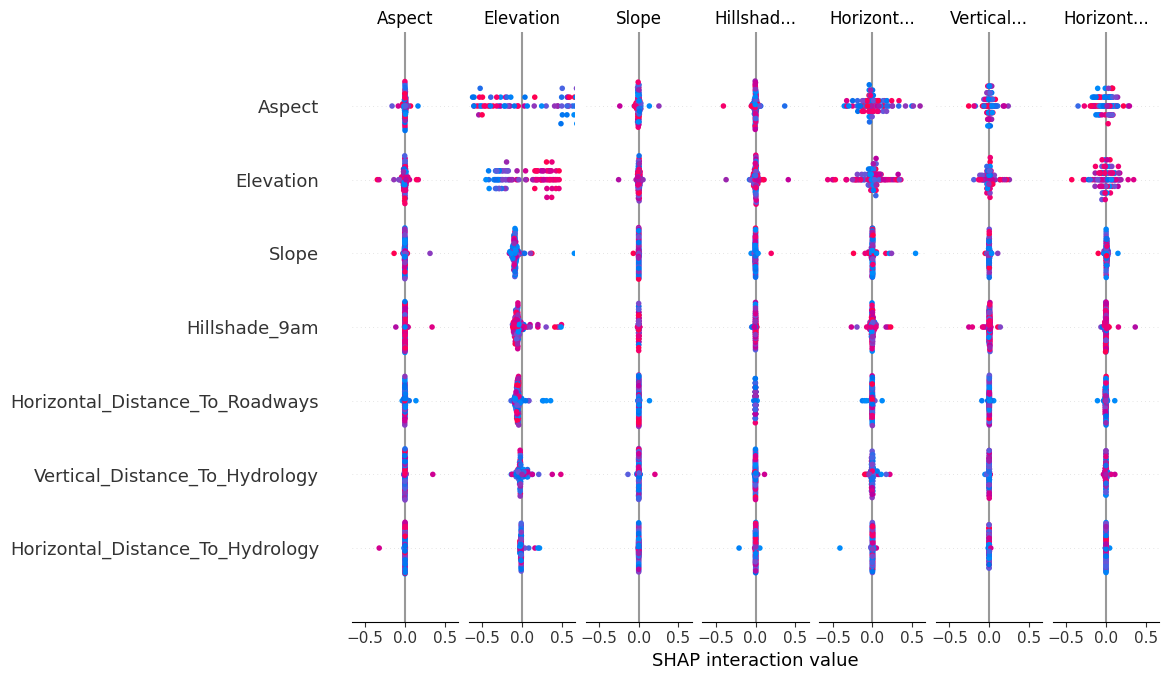

In [6]:
decision_tree_explainer = shap.TreeExplainer(decision_tree_model)

shap_values_tree = decision_tree_explainer.shap_values(X_sample)

shap.summary_plot(
    shap_values_tree, 
    X_sample, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_tree,
    X_sample,
    plot_type="beeswarm"
)


## KNN SHAP Interpretibility 

In [7]:
X_sample_scaled = X_test_scaled[:20]
knn_explainer = shap.KernelExplainer(knn_model.predict_proba, X_sample_scaled)

shap_values_knn = knn_explainer.shap_values(X_sample_scaled, n_samples=100)

100%|██████████| 20/20 [05:52<00:00, 17.65s/it]


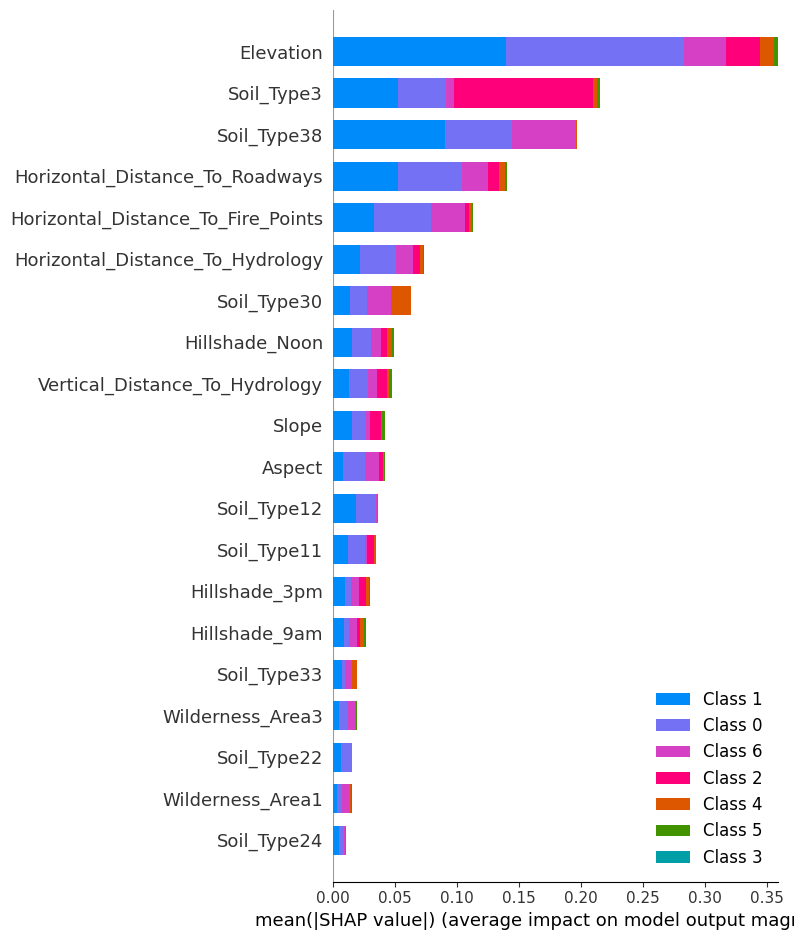

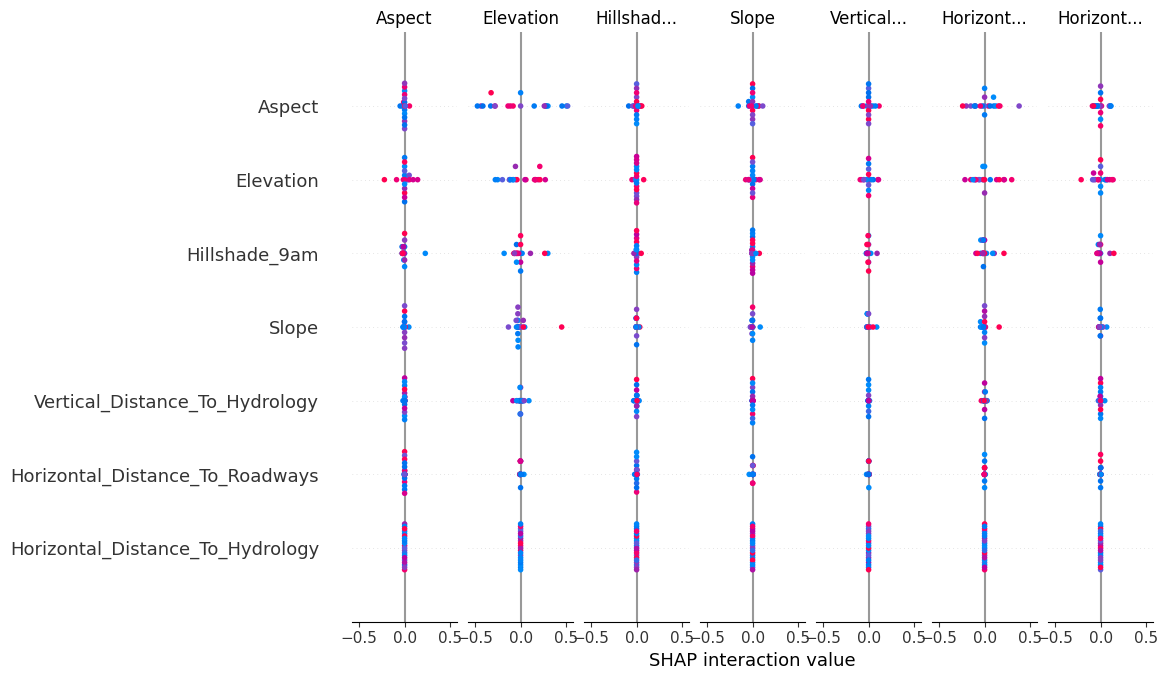

In [8]:
shap.summary_plot(
    shap_values_knn, 
    X_sample_scaled, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_knn,
    X_sample_scaled,
    plot_type="beeswarm"
)